<a href="https://colab.research.google.com/github/MAHESWARI-ROUT/-Bitcoin-Market-Sentiment-Analysis/blob/main/Bitcoin_Market_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U gdown

# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
!gdown --id 1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs -O trader_data.csv
!gdown --id 1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf -O fear_greed_index.csv


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs
To: /content/trader_data.csv
100% 47.5M/47.5M [00:00<00:00, 99.4MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf
To: /content/fear_greed_index.csv
100% 90.8k/90.8k [00:00<00:00, 79.7MB/s]


In [3]:
#datasets
trader_df = pd.read_csv("trader_data.csv")
sentiment_df = pd.read_csv("fear_greed_index.csv")




In [4]:
trader_df.sample(10)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
24486,0x4f93fead39b70a1824f981a54d4e55b278e9f760,BTC,99349.00000,0.20123,19992.00,SELL,06-12-2024 19:59,0.000000,Open Short,0.000000,0x4c0556c499ca3876cf37041891b05502010f006d5583...,53252360585,True,5.997599,4.330000e+14,1.730000e+12
23805,0x4f93fead39b70a1824f981a54d4e55b278e9f760,BTC,87074.00000,0.09320,8115.30,BUY,12-11-2024 03:49,0.345940,Open Long,0.000000,0x590f9ff9f5096591202d04169138c001d20043cd99dc...,46249851082,True,2.840353,1.010000e+15,1.730000e+12
7581,0x513b8629fe877bb581bf244e326a047b249c4ff1,BTC,84978.00000,0.02352,1998.68,BUY,16-04-2025 23:02,69.150530,Open Long,0.000000,0xd5abba27a9f3bc85f3210421ab480901bc00b386f99a...,86991690270,True,0.459696,2.430000e+14,1.740000e+12
54239,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,@107,19.34400,140.75000,2722.67,BUY,19-01-2025 14:56,176.467737,Buy,0.000000,0x5664c97e6364755912ab041bd4b6330202e800564ab9...,64295386923,True,0.049262,3.660000e+14,1.740000e+12
158282,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,@107,18.27000,94.60000,1728.34,SELL,12-12-2024 19:15,648.757971,Sell,54.990732,0x4939041468c5f717d2d004190dbb3502026000e01412...,54923837120,False,0.000000,9.530000e+14,1.730000e+12
129690,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,ADA,0.77517,64.00000,49.61,BUY,21-11-2024 16:00,-528.000000,Close Short,0.913408,0x2c279503c4a3e53b8cee04175791bf01ad005d921fa2...,48968750819,True,0.017363,1.000000e+14,1.730000e+12
158160,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,@107,18.28800,10.00000,182.88,SELL,12-12-2024 19:03,2117.917971,Sell,10.735428,0x83c167c82a7a37187c4e04190d906d0201fd0087d5a8...,54918068482,False,0.000000,7.840000e+14,1.730000e+12
133299,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,AVAX,50.21000,3.08000,154.65,SELL,12-12-2024 13:24,0.000000,Open Short,0.000000,0x51c0ade882b129e83b54041908adc601fe007f4c2714...,54859468987,True,0.054126,4.140000e+14,1.730000e+12
11785,0x513b8629fe877bb581bf244e326a047b249c4ff1,BTC,93440.00000,0.00015,14.02,SELL,28-04-2025 08:12,103.595260,Close Long,-0.177510,0x33d7608b1f77b2a780aa042262efb20201ac00f3d5c8...,89423915249,True,0.003223,5.610000e+14,1.750000e+12
209570,0x271b280974205ca63b716753467d5a371de622ab,SOL,149.29000,12.00000,1791.48,BUY,24-04-2025 00:54,-5687.070000,Close Short,17.398800,0x81167d03c4f1927935e504221d3e0f01e70064f62793...,88403516286,True,0.447870,5.960000e+14,1.750000e+12


In [5]:
sentiment_df.sample(10)

,timestamp,value,classification,date
261,1540272600,24,Extreme Fear,2018-10-23
2519,1735450200,73,Greed,2024-12-29
1054,1608787800,86,Extreme Greed,2020-12-24
1621,1657776600,18,Extreme Fear,2022-07-14
1918,1683437400,64,Greed,2023-05-07
1763,1670045400,27,Fear,2022-12-03
2344,1720243800,26,Fear,2024-07-06
2360,1721626200,70,Greed,2024-07-22
2017,1691991000,50,Neutral,2023-08-14
2074,1696915800,50,Neutral,2023-10-10


In [6]:
sentiment_df.describe()

,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


In [7]:
sentiment_df.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [8]:
trader_df.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [9]:
trader_df.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [10]:
print(sentiment_df.columns)


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [11]:
sentiment_df = sentiment_df.drop(columns=['date'])


trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], errors='coerce')
sentiment_df['timestamp'] = pd.to_datetime(sentiment_df['timestamp'], errors='coerce')


trader_df = trader_df.sort_values('Timestamp IST')
sentiment_df = sentiment_df.sort_values('timestamp')

In [13]:
trader_df['Timestamp IST'].isna().sum()


np.int64(131999)

In [14]:

trader_df = trader_df.dropna(subset=['Timestamp IST'])


In [15]:
sentiment_df = sentiment_df.dropna(subset=['timestamp'])


In [16]:

trader_df = trader_df.sort_values('Timestamp IST')
sentiment_df = sentiment_df.sort_values('timestamp')

# Merging the two datasets
merged_df = pd.merge_asof(
    trader_df,
    sentiment_df,
    left_on='Timestamp IST',
    right_on='timestamp',
    direction='backward'
)


In [17]:
merged_df = merged_df.drop(columns=['timestamp'])


In [20]:
print(merged_df.columns.tolist())


['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'value', 'classification']


In [21]:
merged_df.columns = [col.lower().strip().replace(" ", "_") for col in merged_df.columns]


In [22]:
print(merged_df[['timestamp_ist', 'classification', 'closed_pnl']].head())


        timestamp_ist classification  closed_pnl
0 2023-01-05 01:06:00          Greed         0.0
1 2023-01-05 01:06:00          Greed         0.0
2 2023-01-05 01:06:00          Greed         0.0
3 2023-05-12 03:11:00          Greed         0.0
4 2023-05-12 03:11:00          Greed         0.0


In [23]:
merged_df.head()


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,value,classification
0,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0824,156.39,BUY,2023-01-05 01:06:00,0.0967,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,1.680000e+12,67,Greed
1,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1898.6,0.0722,137.08,BUY,2023-01-05 01:06:00,0.1791,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,1.680000e+12,67,Greed
2,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0967,183.53,BUY,2023-01-05 01:06:00,0.0000,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,1.680000e+12,67,Greed
3,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,41867.0,0.0150,628.00,SELL,2023-05-12 03:11:00,0.0000,Open Short,0.0,0xd2e598f2a6ca3f77dc7b04065f9e8a0139006b7925f4...,4064974623,True,0.157001,1.070000e+15,1.700000e+12,67,Greed
4,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2231.0,3.8932,8685.73,BUY,2023-05-12 03:11:00,7.3187,Open Long,0.0,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4064960965,True,2.171432,1.060000e+15,1.700000e+12,67,Greed


In [24]:
merged_df['pnl_per_token'] = merged_df['closed_pnl'] / merged_df['size_tokens'].replace(0, pd.NA)

merged_df['position_type'] = merged_df['side'].str.lower().map({'buy': 'long', 'sell': 'short'})

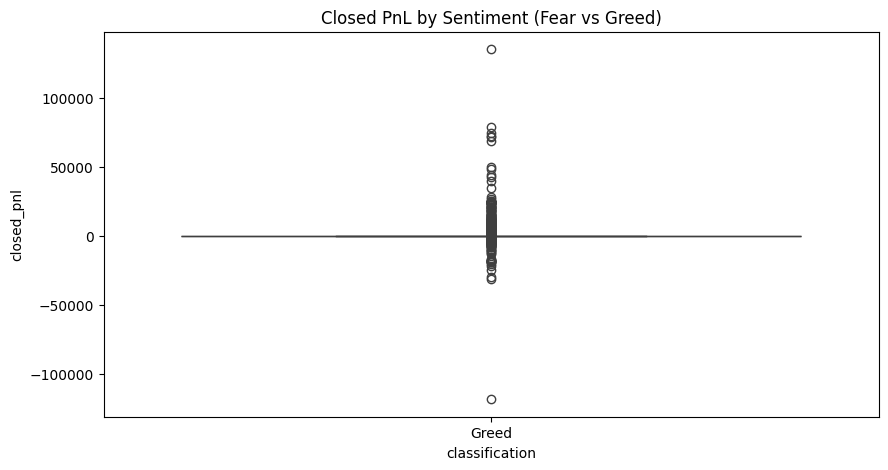

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(data=merged_df, x='classification', y='closed_pnl')
plt.title("Closed PnL by Sentiment (Fear vs Greed)")
plt.show()


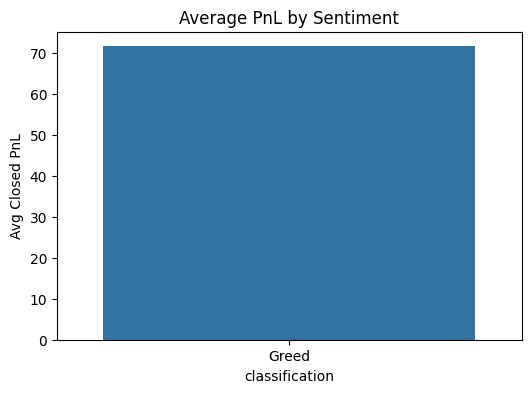

In [26]:
avg_pnl = merged_df.groupby('classification')['closed_pnl'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=avg_pnl, x='classification', y='closed_pnl')
plt.title("Average PnL by Sentiment")
plt.ylabel("Avg Closed PnL")
plt.show()



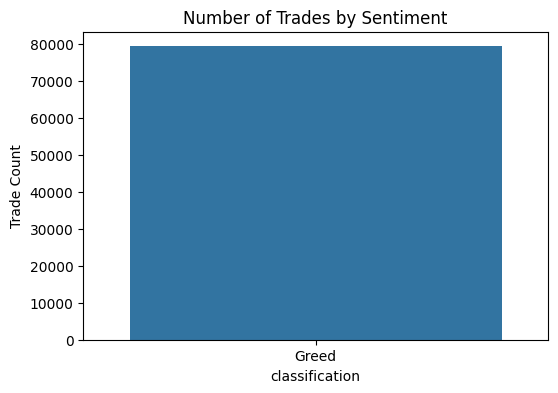

In [27]:
trade_counts = merged_df['classification'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=trade_counts.index, y=trade_counts.values)
plt.title("Number of Trades by Sentiment")
plt.ylabel("Trade Count")
plt.show()


In [29]:
summary = merged_df.groupby('classification').agg({
    'closed_pnl': ['count', 'mean', 'sum'],
    'pnl_per_token': 'mean'
}).round(2)

summary.columns = ['trade_count', 'avg_pnl', 'total_pnl', 'avg_pnl_per_token']
summary = summary.reset_index()


In [31]:
summary.head()

,classification,trade_count,avg_pnl,total_pnl,avg_pnl_per_token
0,Greed,79225,71.68,5678965.03,28.88


In [32]:
merged_df.to_csv("trader_sentiment_analysis.csv", index=False)


In [33]:
from google.colab import files
files.download("trader_sentiment_analysis.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>